<a href="https://colab.research.google.com/github/eltondeoliveirasilva/Regressao_linear/blob/main/Regressao_Linear_Multipla_Limite_Credito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
credito = pd.read_excel('/content/drive/MyDrive/Limite_Credito_Dummy.xlsx')
credito.head()

,Idade,RendimentoTotal,Salario,LimitedeCreditoImediato,Escolaridade,Gênero,Região,LimitedoChequeEspecial
0,70,10736,5214,400,Fundamental_Medio,RJ,F,500
1,68,5000,5000,380,Fundamental_Medio,RJ,F,600
2,44,5800,5800,500,Fundamental_Medio,RJ,F,800
3,72,4300,4300,2000,Fundamental_Medio,RJ,F,1000
4,75,4400,4400,3000,Fundamental_Medio,RJ,F,1000


In [3]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


In [4]:
le.fit(credito.Escolaridade)
credito.Escolaridade = le.transform(credito.Escolaridade)

In [5]:
le.fit(credito.Gênero)
credito.Gênero = le.transform(credito.Gênero)

In [7]:
le.fit(credito.Região)
credito.Região = le.transform(credito.Região)

In [9]:
credito

,Idade,RendimentoTotal,Salario,LimitedeCreditoImediato,Escolaridade,Gênero,Região,LimitedoChequeEspecial
0,70,10736,5214,400,0,0,0,500
1,68,5000,5000,380,0,0,0,600
2,44,5800,5800,500,0,0,0,800
3,72,4300,4300,2000,0,0,0,1000
4,75,4400,4400,3000,0,0,0,1000
5,35,5000,5000,1000,0,0,0,1000
6,80,8100,8100,3500,0,0,0,1000
7,66,4800,4800,440,0,0,0,1500
8,39,6320,6320,1550,0,0,0,1640
9,47,5000,5000,2000,0,1,0,1700


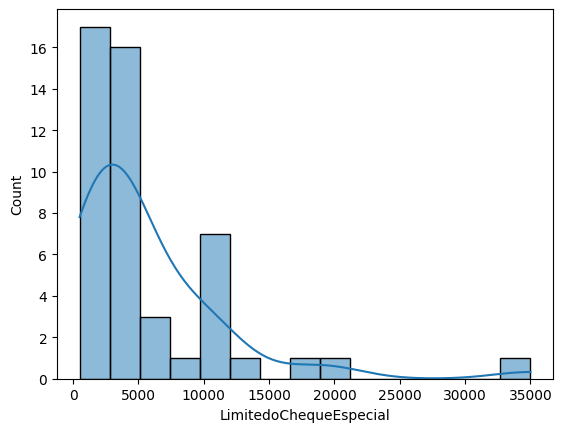

In [11]:
sns.histplot(credito, x='LimitedoChequeEspecial',kde = True);

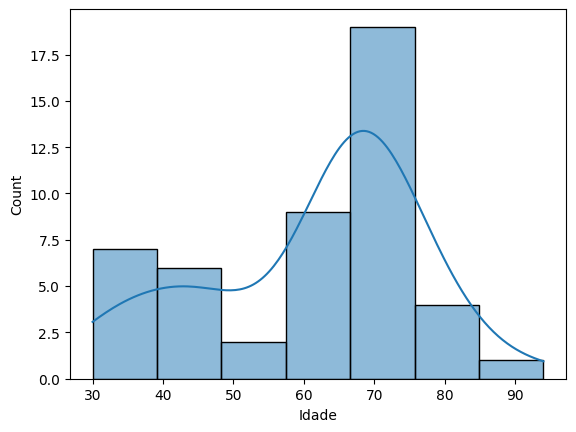

In [12]:
sns.histplot(credito, x='Idade',kde = True);

In [13]:
credito.describe()

,Idade,RendimentoTotal,Salario,LimitedeCreditoImediato,Escolaridade,Gênero,Região,LimitedoChequeEspecial
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,61.458333,12275.083333,10507.125000,2175.208333,0.375000,0.458333,0.500000,5620.729167
std,15.284477,12640.654241,9332.173617,938.094469,0.489246,0.503534,0.505291,6131.900367
min,30.000000,4300.000000,4027.000000,340.000000,0.000000,0.000000,0.000000,500.000000
25%,47.000000,6380.000000,5950.000000,1925.000000,0.000000,0.000000,0.000000,2262.500000
50%,66.500000,8400.000000,7400.000000,2000.000000,0.000000,0.000000,0.500000,3550.000000
75%,70.000000,12378.250000,10163.000000,3000.000000,1.000000,1.000000,1.000000,6500.000000
max,94.000000,81000.000000,54500.000000,3500.000000,1.000000,1.000000,1.000000,35000.000000


In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [20]:
credito_norm = pd.DataFrame(scaler.fit_transform(credito), index=credito.index,columns=credito.columns)
credito_norm.describe()

,Idade,RendimentoTotal,Salario,LimitedeCreditoImediato,Escolaridade,Gênero,Região,LimitedoChequeEspecial
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,0.491536,0.103978,0.128388,0.580762,0.375000,0.458333,0.500000,0.148427
std,0.238820,0.164806,0.184894,0.296865,0.489246,0.503534,0.505291,0.177736
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.265625,0.027119,0.038100,0.501582,0.000000,0.000000,0.000000,0.051087
50%,0.570312,0.053455,0.066828,0.525316,0.000000,0.000000,0.500000,0.088406
75%,0.625000,0.105323,0.121570,0.841772,1.000000,1.000000,1.000000,0.173913
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [21]:
import statsmodels.formula.api as smf

In [22]:
function = 'LimitedoChequeEspecial~Idade+RendimentoTotal+Salario+LimitedeCreditoImediato+Escolaridade+Gênero+Região'
model = smf.ols(formula=function, data=credito_norm).fit()
print(model.summary())

                              OLS Regression Results                              
Dep. Variable:     LimitedoChequeEspecial   R-squared:                       0.886
Model:                                OLS   Adj. R-squared:                  0.865
Method:                     Least Squares   F-statistic:                     44.20
Date:                    Mon, 12 Aug 2024   Prob (F-statistic):           7.44e-17
Time:                            20:12:32   Log-Likelihood:                 67.328
No. Observations:                      48   AIC:                            -118.7
Df Residuals:                          40   BIC:                            -103.7
Df Model:                               7                                         
Covariance Type:                nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

In [23]:
function = 'LimitedoChequeEspecial~RendimentoTotal+Salario+LimitedeCreditoImediato+Escolaridade+Gênero+Região'
model = smf.ols(formula=function, data=credito_norm).fit()
print(model.summary())

                              OLS Regression Results                              
Dep. Variable:     LimitedoChequeEspecial   R-squared:                       0.885
Model:                                OLS   Adj. R-squared:                  0.869
Method:                     Least Squares   F-statistic:                     52.78
Date:                    Mon, 12 Aug 2024   Prob (F-statistic):           9.97e-18
Time:                            20:15:05   Log-Likelihood:                 67.299
No. Observations:                      48   AIC:                            -120.6
Df Residuals:                          41   BIC:                            -107.5
Df Model:                               6                                         
Covariance Type:                nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

In [24]:
function = 'LimitedoChequeEspecial~RendimentoTotal+Salario+Escolaridade+Gênero+Região'
model = smf.ols(formula=function, data=credito_norm).fit()
print(model.summary())

                              OLS Regression Results                              
Dep. Variable:     LimitedoChequeEspecial   R-squared:                       0.884
Model:                                OLS   Adj. R-squared:                  0.871
Method:                     Least Squares   F-statistic:                     64.26
Date:                    Mon, 12 Aug 2024   Prob (F-statistic):           1.39e-18
Time:                            20:15:38   Log-Likelihood:                 67.097
No. Observations:                      48   AIC:                            -122.2
Df Residuals:                          42   BIC:                            -111.0
Df Model:                               5                                         
Covariance Type:                nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
In

In [25]:
function = 'LimitedoChequeEspecial~RendimentoTotal+Salario+Gênero+Região'
model = smf.ols(formula=function, data=credito_norm).fit()
print(model.summary())

                              OLS Regression Results                              
Dep. Variable:     LimitedoChequeEspecial   R-squared:                       0.883
Model:                                OLS   Adj. R-squared:                  0.872
Method:                     Least Squares   F-statistic:                     80.75
Date:                    Mon, 12 Aug 2024   Prob (F-statistic):           2.02e-19
Time:                            20:16:00   Log-Likelihood:                 66.709
No. Observations:                      48   AIC:                            -123.4
Df Residuals:                          43   BIC:                            -114.1
Df Model:                               4                                         
Covariance Type:                nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
In

In [27]:
function = 'LimitedoChequeEspecial~Salario+Gênero+Região-1'
model = smf.ols(formula=function, data=credito_norm).fit()
print(model.summary())

                                   OLS Regression Results                                  
Dep. Variable:     LimitedoChequeEspecial   R-squared (uncentered):                   0.925
Model:                                OLS   Adj. R-squared (uncentered):              0.920
Method:                     Least Squares   F-statistic:                              185.0
Date:                    Mon, 12 Aug 2024   Prob (F-statistic):                    2.56e-25
Time:                            20:16:56   Log-Likelihood:                          64.573
No. Observations:                      48   AIC:                                     -123.1
Df Residuals:                          45   BIC:                                     -117.5
Df Model:                               3                                                  
Covariance Type:                nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-

In [29]:
x = credito_norm[['Salario','Gênero','Região']]
y = credito_norm[['LimitedoChequeEspecial']]

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [31]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [32]:
r_sq = lr.score(x_train, y_train)
print(r_sq)

0.9433192322593952


In [35]:
y_pred_treino = lr.predict(x_train)
print('MAE:', metrics.mean_absolute_error(y_train, y_pred_treino))
print('MSE:', metrics.mean_squared_error(y_train, y_pred_treino))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred_treino)))

MAE: 0.0322662123204248
MSE: 0.0022747205009159745
RMSE: 0.04769403003433422


In [36]:
lr.fit(x_test, y_test)
print(lr.score(x_test, y_test))

0.6887162290517201


In [37]:
y_pred_teste = lr.predict(x_test)
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_teste))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_teste))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_pred_teste)))

MAE: 0.04485199423158071
MSE: 0.003020023029010001
RMSE: 0.054954736183608424
